In [4]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib as plt
import pandas as pd
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from scipy.sparse import csr_matrix, hstack
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score

In [6]:
df= pd.read_csv("depression_data.csv")

In [7]:
df.head()

,Name,Age,Marital Status,Education Level,Number of Children,Smoking Status,Physical Activity Level,Employment Status,Income,Alcohol Consumption,Dietary Habits,Sleep Patterns,History of Mental Illness,History of Substance Abuse,Family History of Depression,Chronic Medical Conditions
0,Christine Barker,31,Married,Bachelor's Degree,2,Non-smoker,Active,Unemployed,26265.67,Moderate,Moderate,Fair,Yes,No,Yes,Yes
1,Jacqueline Lewis,55,Married,High School,1,Non-smoker,Sedentary,Employed,42710.36,High,Unhealthy,Fair,Yes,No,No,Yes
2,Shannon Church,78,Widowed,Master's Degree,1,Non-smoker,Sedentary,Employed,125332.79,Low,Unhealthy,Good,No,No,Yes,No
3,Charles Jordan,58,Divorced,Master's Degree,3,Non-smoker,Moderate,Unemployed,9992.78,Moderate,Moderate,Poor,No,No,No,No
4,Michael Rich,18,Single,High School,0,Non-smoker,Sedentary,Unemployed,8595.08,Low,Moderate,Fair,Yes,No,Yes,Yes


In [8]:
df.columns

Index(['Name', 'Age', 'Marital Status', 'Education Level',
       'Number of Children', 'Smoking Status', 'Physical Activity Level',
       'Employment Status', 'Income', 'Alcohol Consumption', 'Dietary Habits',
       'Sleep Patterns', 'History of Mental Illness',
       'History of Substance Abuse', 'Family History of Depression',
       'Chronic Medical Conditions'],
      dtype='object')

In [9]:
df.isnull().sum()

Name                            0
Age                             0
Marital Status                  0
Education Level                 0
Number of Children              0
Smoking Status                  0
Physical Activity Level         0
Employment Status               0
Income                          0
Alcohol Consumption             0
Dietary Habits                  0
Sleep Patterns                  0
History of Mental Illness       0
History of Substance Abuse      0
Family History of Depression    0
Chronic Medical Conditions      0
dtype: int64

In [6]:
df.dtypes

Name                             object
Age                               int64
Marital Status                   object
Education Level                  object
Number of Children                int64
Smoking Status                   object
Physical Activity Level          object
Employment Status                object
Income                          float64
Alcohol Consumption              object
Dietary Habits                   object
Sleep Patterns                   object
History of Mental Illness        object
History of Substance Abuse       object
Family History of Depression     object
Chronic Medical Conditions       object
dtype: object

In [10]:
df = df.drop('Name', axis=1)
df.head()

,Age,Marital Status,Education Level,Number of Children,Smoking Status,Physical Activity Level,Employment Status,Income,Alcohol Consumption,Dietary Habits,Sleep Patterns,History of Mental Illness,History of Substance Abuse,Family History of Depression,Chronic Medical Conditions
0,31,Married,Bachelor's Degree,2,Non-smoker,Active,Unemployed,26265.67,Moderate,Moderate,Fair,Yes,No,Yes,Yes
1,55,Married,High School,1,Non-smoker,Sedentary,Employed,42710.36,High,Unhealthy,Fair,Yes,No,No,Yes
2,78,Widowed,Master's Degree,1,Non-smoker,Sedentary,Employed,125332.79,Low,Unhealthy,Good,No,No,Yes,No
3,58,Divorced,Master's Degree,3,Non-smoker,Moderate,Unemployed,9992.78,Moderate,Moderate,Poor,No,No,No,No
4,18,Single,High School,0,Non-smoker,Sedentary,Unemployed,8595.08,Low,Moderate,Fair,Yes,No,Yes,Yes


In [11]:
# Identify categorical and numerical columns
categorical_columns = df.select_dtypes(include=['object']).columns
numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns

In [12]:
print(categorical_columns)
print(numerical_columns)

Index(['Marital Status', 'Education Level', 'Smoking Status',
       'Physical Activity Level', 'Employment Status', 'Alcohol Consumption',
       'Dietary Habits', 'Sleep Patterns', 'History of Mental Illness',
       'History of Substance Abuse', 'Family History of Depression',
       'Chronic Medical Conditions'],
      dtype='object')
Index(['Age', 'Number of Children', 'Income'], dtype='object')


In [13]:
# Summary statistics for numerical columns
print(df.describe())

                 Age  Number of Children         Income
count  413768.000000       413768.000000  413768.000000
mean       49.000713            1.298972   50661.707971
std        18.158759            1.237054   40624.100565
min        18.000000            0.000000       0.410000
25%        33.000000            0.000000   21001.030000
50%        49.000000            1.000000   37520.135000
75%        65.000000            2.000000   76616.300000
max        80.000000            4.000000  209995.220000


In [11]:
# DataFrame info
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 413768 entries, 0 to 413767
Data columns (total 15 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   Age                           413768 non-null  int64  
 1   Marital Status                413768 non-null  object 
 2   Education Level               413768 non-null  object 
 3   Number of Children            413768 non-null  int64  
 4   Smoking Status                413768 non-null  object 
 5   Physical Activity Level       413768 non-null  object 
 6   Employment Status             413768 non-null  object 
 7   Income                        413768 non-null  float64
 8   Alcohol Consumption           413768 non-null  object 
 9   Dietary Habits                413768 non-null  object 
 10  Sleep Patterns                413768 non-null  object 
 11  History of Mental Illness     413768 non-null  object 
 12  History of Substance Abuse    413768 non-nul

In [14]:
# Get unique values and counts for categorical columns
categorical_columns = df.select_dtypes(include=['object']).columns
for column in categorical_columns:
    print(f"Column: {column}")
    print(df[column].value_counts(dropna=False))  # Include NaN values if any
    print()


Column: Marital Status
Marital Status
Married     240444
Single       72110
Widowed      68485
Divorced     32729
Name: count, dtype: int64

Column: Education Level
Education Level
Bachelor's Degree    124329
High School          118927
Associate Degree      79999
Master's Degree       73768
PhD                   16745
Name: count, dtype: int64

Column: Smoking Status
Smoking Status
Non-smoker    247416
Former        116184
Current        50168
Name: count, dtype: int64

Column: Physical Activity Level
Physical Activity Level
Sedentary    176850
Moderate     158013
Active        78905
Name: count, dtype: int64

Column: Employment Status
Employment Status
Employed      265659
Unemployed    148109
Name: count, dtype: int64

Column: Alcohol Consumption
Alcohol Consumption
Moderate    173440
Low         139250
High        101078
Name: count, dtype: int64

Column: Dietary Habits
Dietary Habits
Unhealthy    170817
Moderate     170446
Healthy       72505
Name: count, dtype: int64

Column: Sle

In [15]:
le = preprocessing.LabelEncoder()

In [16]:
df['Marital Status']= le.fit_transform(df['Marital Status'])
df['Education Level']= le.fit_transform(df['Education Level'])
df['Smoking Status']= le.fit_transform(df['Smoking Status'])
df['Physical Activity Level']= le.fit_transform(df['Physical Activity Level'])
df['Employment Status']= le.fit_transform(df['Employment Status'])
df['Alcohol Consumption']= le.fit_transform(df['Alcohol Consumption'])
df['Dietary Habits']= le.fit_transform(df['Dietary Habits'])
df['Sleep Patterns']= le.fit_transform(df['Sleep Patterns'])
df['History of Mental Illness']= le.fit_transform(df['History of Mental Illness'])
df['History of Substance Abuse']= le.fit_transform(df['History of Substance Abuse'])
df['Family History of Depression']= le.fit_transform(df['Family History of Depression'])
df['Chronic Medical Conditions']= le.fit_transform(df['Chronic Medical Conditions'])

np.random.seed(42)  # For reproducibility
df['Has Depression'] = np.random.choice([0, 1], size=len(df))

df['Has Depression']= le.fit_transform(df['Has Depression'])

In [17]:
df.columns

Index(['Age', 'Marital Status', 'Education Level', 'Number of Children',
       'Smoking Status', 'Physical Activity Level', 'Employment Status',
       'Income', 'Alcohol Consumption', 'Dietary Habits', 'Sleep Patterns',
       'History of Mental Illness', 'History of Substance Abuse',
       'Family History of Depression', 'Chronic Medical Conditions',
       'Has Depression'],
      dtype='object')

In [18]:
X = df.drop(columns=['Has Depression'])
y = df['Has Depression']

In [19]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=43)

In [21]:
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

In [22]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [23]:
pca = PCA(n_components=0.80) 
X_pca = pca.fit_transform(X_scaled)

print(f'Original number of features: {X.shape[1]}')
print(f'Reduced number of features: {X_pca.shape[1]}')

Original number of features: 15
Reduced number of features: 10


In [27]:
from sklearn.tree import DecisionTreeClassifier

# Initialize and train the model
model = DecisionTreeClassifier()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate performance
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.49989929993313514
Classification Report:
               precision    recall  f1-score   support

           0       0.50      0.50      0.50     61907
           1       0.50      0.50      0.50     62224

    accuracy                           0.50    124131
   macro avg       0.50      0.50      0.50    124131
weighted avg       0.50      0.50      0.50    124131



In [23]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.5002295961524519
Classification Report:
               precision    recall  f1-score   support

           0       0.50      0.51      0.50     41153
           1       0.50      0.49      0.50     41601

    accuracy                           0.50     82754
   macro avg       0.50      0.50      0.50     82754
weighted avg       0.50      0.50      0.50     82754



In [ ]:
# from sklearn.svm import SVC

# model = SVC()
# model.fit(X_train, y_train)
# y_pred = model.predict(X_test)
# print("Accuracy:", accuracy_score(y_test, y_pred))
# print("Classification Report:\n", classification_report(y_test, y_pred))

In [24]:
from sklearn.ensemble import GradientBoostingClassifier

model = GradientBoostingClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.49951663967904875
Classification Report:
               precision    recall  f1-score   support

           0       0.50      0.54      0.52     41153
           1       0.50      0.46      0.48     41601

    accuracy                           0.50     82754
   macro avg       0.50      0.50      0.50     82754
weighted avg       0.50      0.50      0.50     82754



In [25]:
from sklearn.neighbors import KNeighborsClassifier

model = KNeighborsClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.5032143461343258
Classification Report:
               precision    recall  f1-score   support

           0       0.50      0.50      0.50     41153
           1       0.51      0.50      0.51     41601

    accuracy                           0.50     82754
   macro avg       0.50      0.50      0.50     82754
weighted avg       0.50      0.50      0.50     82754



In [27]:
from sklearn.ensemble import AdaBoostClassifier

model = AdaBoostClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


/home/ranga/Downloads/KLU-ML/ml/lib/python3.10/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


Accuracy: 0.49680982188172174
Classification Report:
               precision    recall  f1-score   support

           0       0.49      0.54      0.51     41153
           1       0.50      0.46      0.48     41601

    accuracy                           0.50     82754
   macro avg       0.50      0.50      0.50     82754
weighted avg       0.50      0.50      0.50     82754



In [28]:
from sklearn.naive_bayes import GaussianNB

model = GaussianNB()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.5008337965536409
Classification Report:
               precision    recall  f1-score   support

           0       0.50      0.55      0.52     41153
           1       0.50      0.45      0.48     41601

    accuracy                           0.50     82754
   macro avg       0.50      0.50      0.50     82754
weighted avg       0.50      0.50      0.50     82754



In [32]:
import xgboost as xgb

model = xgb.XGBClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))
    

Accuracy: 0.49997583198395246
Classification Report:
               precision    recall  f1-score   support

           0       0.50      0.50      0.50     41153
           1       0.50      0.50      0.50     41601

    accuracy                           0.50     82754
   macro avg       0.50      0.50      0.50     82754
weighted avg       0.50      0.50      0.50     82754



In [33]:
import lightgbm as lgb

model = lgb.LGBMClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 165526, number of negative: 165488
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.012504 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 358
[LightGBM] [Info] Number of data points in the train set: 331014, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500057 -> initscore=0.000230
[LightGBM] [Info] Start training from score 0.000230
Accuracy: 0.4985015830050511
Classification Report:
               precision    recall  f1-score   support

           0       0.50      0.54      0.52     41153
           1       0.50      0.46      0.48     41601

    accuracy                           0.50     82754
   macro avg       0.50      0.50      0.50     82754
weighted avg       0.50      0.50    

In [34]:
from catboost import CatBoostClassifier

model = CatBoostClassifier(learning_rate=0.1, depth=6, iterations=1000)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


0:	learn: 0.6931072	total: 95.1ms	remaining: 1m 35s
1:	learn: 0.6931070	total: 128ms	remaining: 1m 3s
2:	learn: 0.6930934	total: 149ms	remaining: 49.5s
3:	learn: 0.6930846	total: 170ms	remaining: 42.3s
4:	learn: 0.6930672	total: 190ms	remaining: 37.9s
5:	learn: 0.6930450	total: 211ms	remaining: 34.9s
6:	learn: 0.6930261	total: 230ms	remaining: 32.6s
7:	learn: 0.6930069	total: 248ms	remaining: 30.8s
8:	learn: 0.6929840	total: 268ms	remaining: 29.5s
9:	learn: 0.6929655	total: 289ms	remaining: 28.6s
10:	learn: 0.6929481	total: 320ms	remaining: 28.8s
11:	learn: 0.6929373	total: 345ms	remaining: 28.4s
12:	learn: 0.6929259	total: 370ms	remaining: 28.1s
13:	learn: 0.6929100	total: 401ms	remaining: 28.2s
14:	learn: 0.6928942	total: 429ms	remaining: 28.2s
15:	learn: 0.6928855	total: 448ms	remaining: 27.6s
16:	learn: 0.6928726	total: 468ms	remaining: 27.1s
17:	learn: 0.6928535	total: 488ms	remaining: 26.6s
18:	learn: 0.6928330	total: 517ms	remaining: 26.7s
19:	learn: 0.6928184	total: 560ms	remai

/home/ranga/Downloads/KLU-ML/ml/lib/python3.10/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/home/ranga/Downloads/KLU-ML/ml/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [21:01:46] WARNING: /workspace/src/common/error_msg.cc:45: `gpu_id` is deprecated since2.0.0, use `device` instead. E.g. device=cpu/cuda/cuda:0
  warnings.warn(smsg, UserWarning)
/home/ranga/Downloads/KLU-ML/ml/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [21:01:46] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/home/ranga/Downloads/KLU-ML/ml/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [21:01:46

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 144903, number of negative: 144734
[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 358
[LightGBM] [Info] Number of data points in the train set: 289637, number of used features: 15
[LightGBM] [Info] Using GPU Device: NVIDIA GeForce GTX 1650, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 256 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Info] Size of histogram bin entry: 8
[LightGBM] [Info] 10 dense feature groups (3.31 MB) transferred to GPU in 0.005594 secs. 1 sparse feature groups
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500292 -> initscore=0.001167
[LightGBM] [Info] Start training from score 0.001167
0:	learn: 0.6931126	total: 7.56ms	remaining: 7.56s
1:	learn: 0.6930778	total: 14.7ms	remaining: 7.31s
2:	learn: 0.6930518	total: 21.4ms	remaining: 7.12s
3:	learn: 0.6930274	total: 28.7ms	r

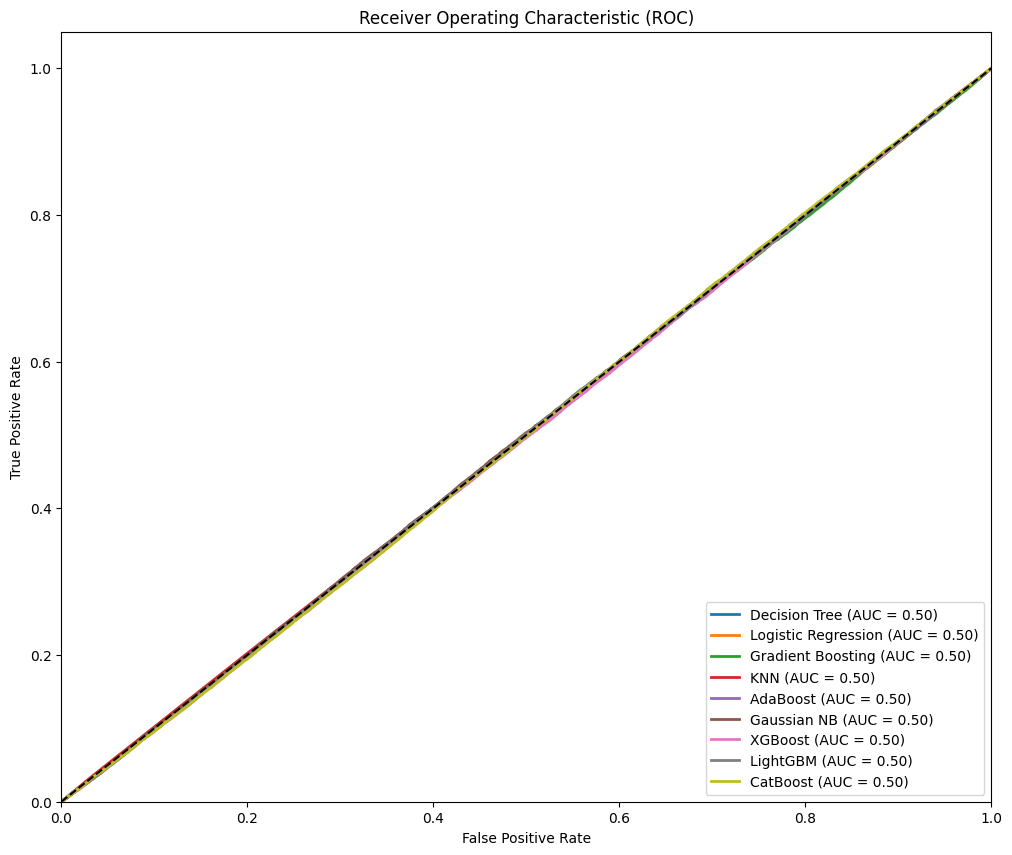

In [39]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Define a function to plot ROC curve
def plot_roc_curve(fpr, tpr, roc_auc, label):
    plt.plot(fpr, tpr, lw=2, label=f'{label} (AUC = {roc_auc:.2f})')

plt.figure(figsize=(12, 10))

# DecisionTreeClassifier
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
model.fit(X_train, y_train)
y_prob = model.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)
plot_roc_curve(fpr, tpr, roc_auc, 'Decision Tree')

# LogisticRegression
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)
y_prob = model.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)
plot_roc_curve(fpr, tpr, roc_auc, 'Logistic Regression')

# GradientBoostingClassifier
from sklearn.ensemble import GradientBoostingClassifier
model = GradientBoostingClassifier()
model.fit(X_train, y_train)
y_prob = model.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)
plot_roc_curve(fpr, tpr, roc_auc, 'Gradient Boosting')

# KNeighborsClassifier
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier()
model.fit(X_train, y_train)
y_prob = model.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)
plot_roc_curve(fpr, tpr, roc_auc, 'KNN')

# AdaBoostClassifier
from sklearn.ensemble import AdaBoostClassifier
model = AdaBoostClassifier()
model.fit(X_train, y_train)
y_prob = model.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)
plot_roc_curve(fpr, tpr, roc_auc, 'AdaBoost')

# GaussianNB
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(X_train, y_train)
y_prob = model.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)
plot_roc_curve(fpr, tpr, roc_auc, 'Gaussian NB')

# XGBoost (GPU)
import xgboost as xgb
model = xgb.XGBClassifier(tree_method='gpu_hist', gpu_id=0)  # Ensure GPU is enabled
model.fit(X_train, y_train)
y_prob = model.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)
plot_roc_curve(fpr, tpr, roc_auc, 'XGBoost')

# LightGBM (GPU)
import lightgbm as lgb
model = lgb.LGBMClassifier(device='gpu')  # Ensure GPU is enabled
model.fit(X_train, y_train)
y_prob = model.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)
plot_roc_curve(fpr, tpr, roc_auc, 'LightGBM')

# CatBoost (GPU)
from catboost import CatBoostClassifier
model = CatBoostClassifier(learning_rate=0.1, depth=6, iterations=1000, 
                           task_type='GPU', devices='0')  # Ensure GPU is enabled
model.fit(X_train, y_train)
y_prob = model.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)
plot_roc_curve(fpr, tpr, roc_auc, 'CatBoost')

# Final plot settings
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc='lower right')
plt.show()